In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from functions import criar_Perceptron,criar_MLP,dividir_dados
import os
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit

2025-01-23 16:23:14.077954: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-23 16:23:14.103255: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-23 16:23:14.111533: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-23 16:23:14.131162: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
dados = pd.read_csv("dados/dados_imperfeito_poisson.csv")
del dados['Unnamed: 0']
dados

,comprimento de onda,cor
0,464.00,azul
1,467.65,azul
2,471.31,azul
3,464.96,azul
4,471.61,azul
...,...,...
195,597.39,verde
196,599.04,verde
197,594.69,verde
198,593.35,verde


In [3]:
# Cria a camada de normalização
normalization_layer = keras.layers.Normalization(axis=-1)

# Adapta a camada aos dados (necessário para calcular a média e o desvio padrão)
normalization_layer.adapt(dados['comprimento de onda'].values.reshape(-1, 1))

I0000 00:00:1737660196.698225   20892 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1737660196.752295   20892 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1737660196.752523   20892 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1737660196.753593   20892 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

In [4]:
encoder = OneHotEncoder()
cor_encoded = encoder.fit_transform(dados['cor'].values.reshape(-1,1))
cor_encoded.toarray()

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [5]:
dados['cor encoded'] = cor_encoded.toarray()[:,0].copy()
dados

,comprimento de onda,cor,cor encoded
0,464.00,azul,1.0
1,467.65,azul,1.0
2,471.31,azul,1.0
3,464.96,azul,1.0
4,471.61,azul,1.0
...,...,...,...
195,597.39,verde,0.0
196,599.04,verde,0.0
197,594.69,verde,0.0
198,593.35,verde,0.0


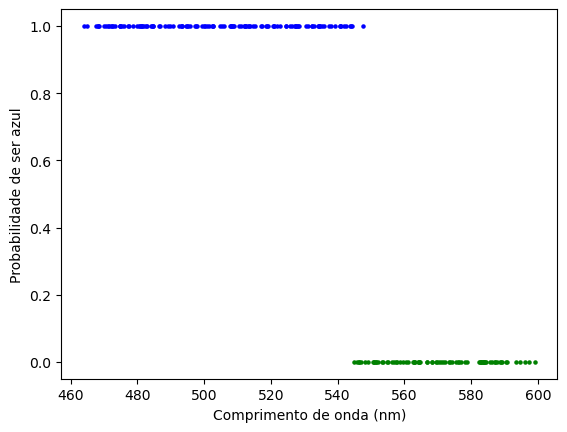

In [6]:
azul = dados[dados['cor']=='azul']
verde = dados[dados['cor']=='verde']

plt.scatter(azul['comprimento de onda'],azul['cor encoded'],color='blue',s=5)
plt.scatter(verde['comprimento de onda'],verde['cor encoded'],color='green',s=5)
plt.ylabel('Probabilidade de ser azul')
plt.xlabel('Comprimento de onda (nm)')
plt.savefig('imagens/conjunto de dados com ruído poisson.png')

In [7]:
dados

,comprimento de onda,cor,cor encoded
0,464.00,azul,1.0
1,467.65,azul,1.0
2,471.31,azul,1.0
3,464.96,azul,1.0
4,471.61,azul,1.0
...,...,...,...
195,597.39,verde,0.0
196,599.04,verde,0.0
197,594.69,verde,0.0
198,593.35,verde,0.0


In [8]:
x_train,y_train,x_test,y_test,strat_train_set,strat_test_set = dividir_dados(dados)

In [9]:
learning_rate_exponent = 3

path_perceptron = f'modelos/perceptron_poisson_{learning_rate_exponent}.keras'
path_mlp = f'modelos/MLP_poisson_{learning_rate_exponent}.keras'

if not os.path.exists(path_mlp):
    MLP = criar_MLP(x_train, strat_train_set, 1 / 10**learning_rate_exponent)
    MLP.save(path_mlp)
else:
    MLP = keras.models.load_model(path_mlp)
if not os.path.exists(path_perceptron):
    Perceptron = criar_Perceptron(x_train,strat_train_set,learning_rate=1/10**learning_rate_exponent)
    Perceptron.save(path_perceptron)
else:
    Perceptron = keras.models.load_model(path_perceptron)

In [10]:
MLP.fit(x_train,y_train,epochs=100)

Epoch 1/100


I0000 00:00:1737660197.880392   21103 service.cc:146] XLA service 0x700dc4006d60 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1737660197.880420   21103 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce MX250, Compute Capability 6.1
2025-01-23 16:23:17.897351: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-01-23 16:23:17.933967: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 90101


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8843 - loss: 0.6646
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9019 - loss: 0.6610 
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9005 - loss: 0.6521 
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9330 - loss: 0.6458 
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9178 - loss: 0.6408 
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9242 - loss: 0.6336 
Epoch 7/100
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8750 - loss: 0.6372

I0000 00:00:1737660198.703863   21103 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9177 - loss: 0.6291 
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9228 - loss: 0.6213 
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9072 - loss: 0.6182 
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9194 - loss: 0.6082 
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9220 - loss: 0.6027 
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9363 - loss: 0.5983 
Epoch 13/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9519 - loss: 0.5873 
Epoch 14/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9211 - loss: 0.5916 
Epoch 15/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9254 - loss: 0.5809 
Epoch 16/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9384 - loss: 0.5756 
Epoch 17/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9319 - loss: 0.5689 
Epoch 18/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9436 - loss: 0.5

In [11]:
Perceptron.fit(x_train,y_train,epochs=100)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1318 - loss: 1.2657
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1253 - loss: 1.2662 
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1044 - loss: 1.2668 
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0858 - loss: 1.3071 
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1096 - loss: 1.2864 
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1079 - loss: 1.2450 
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1426 - loss: 1.2600 
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0997 - loss: 1.3033 
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1088 - loss: 1.2522 
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1044 - loss: 1.2516 
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0823 - loss: 1.2733 
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1109 - loss

In [12]:
np.argmax(Perceptron.predict(x_test),axis=1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


array([1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1])

In [13]:
resultado = np.argmax(y_test,axis=1)
predito = np.argmax(MLP.predict(x_test),axis=1)


# Calcula a acurácia diretamente
accuracy = np.mean(resultado == predito)
print(f"Acurácia com mlp: {accuracy}")

predito = np.argmax(Perceptron.predict(x_test),axis=1)

accuracy = np.mean(resultado==predito)

print(f'Acurácia do Perceptron: {accuracy}')


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
Acurácia com mlp: 0.975
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Acurácia do Perceptron: 0.25


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


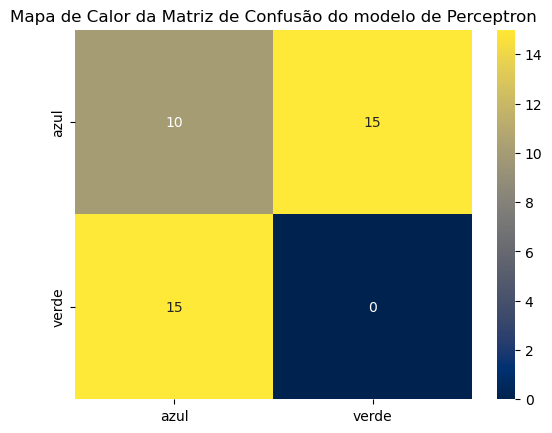

In [14]:
labels = ('azul','verde')
predito = np.argmax(Perceptron.predict(x_test),axis=1)
sns.heatmap(confusion_matrix(resultado,
                             predito),
                             xticklabels=labels,
                             yticklabels=labels,annot=True,
                             cmap='cividis',
                             )
title = "Mapa de Calor da Matriz de Confusão do modelo de Perceptron"
plt.title(title)
plt.savefig(f'imagens/{title}_poisson.png')

In [15]:
predito = np.argmax(MLP.predict(x_test),axis=1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


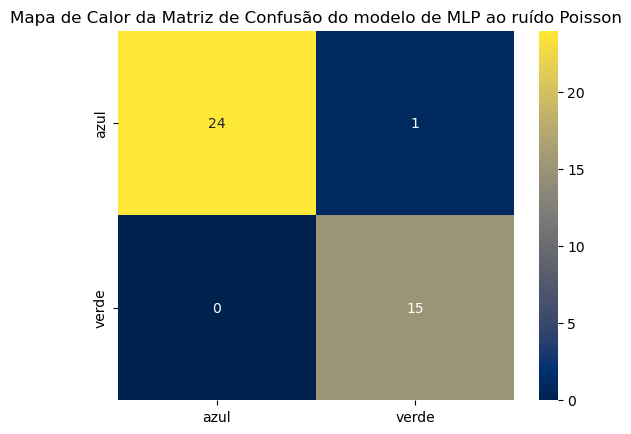

In [ ]:
labels = ('azul','verde')
predito = np.argmax(MLP.predict(x_test),axis=1)
sns.heatmap(confusion_matrix(resultado,
                             predito),
                             xticklabels=labels,
                             yticklabels=labels,annot=True,
                             cmap='cividis',
                             )
title = "Mapa de Calor da Matriz de Confusão do modelo de MLP"
plt.title(title)
plt.savefig(f'imagens/{title}_poisson.png')

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


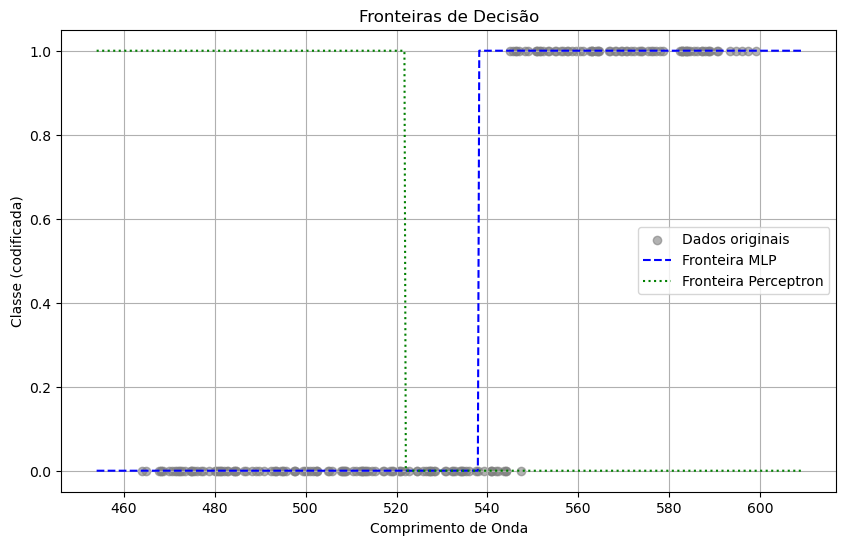

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Gera uma malha de pontos
x_min, x_max = dados['comprimento de onda'].min() - 10, dados['comprimento de onda'].max() + 10
xx = np.linspace(x_min, x_max, 500).reshape(-1, 1)

# Predição para os modelos
mlp_pred = np.argmax(MLP.predict(xx), axis=1)
perceptron_pred = np.argmax(Perceptron.predict(xx), axis=1)

# Converte as classes para rótulos
encoder = LabelEncoder()
encoder.fit(['azul', 'verde'])

# Plota as fronteiras de decisão
plt.figure(figsize=(10, 6))
plt.scatter(dados['comprimento de onda'], encoder.transform(dados['cor']), c='gray', label='Dados originais', alpha=0.6)
plt.plot(xx, mlp_pred, label="Fronteira MLP", color="blue", linestyle="--")
plt.plot(xx, perceptron_pred, label="Fronteira Perceptron", color="green", linestyle=":")
plt.title("Fronteiras de Decisão")
plt.xlabel("Comprimento de Onda")
plt.ylabel("Classe (codificada)")
plt.legend()
plt.grid(True)
plt.savefig("imagens/fronteiras_decisao.png")
plt.show()
